<a href="https://colab.research.google.com/github/AndrewHolm/MNIST/blob/main/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2610 - accuracy: 0.9258 - val_loss: 0.1397 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9657 - val_loss: 0.1030 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0795 - accuracy: 0.9763 - val_loss: 0.0820 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0754 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0807 - val_accuracy: 0.9741
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - 

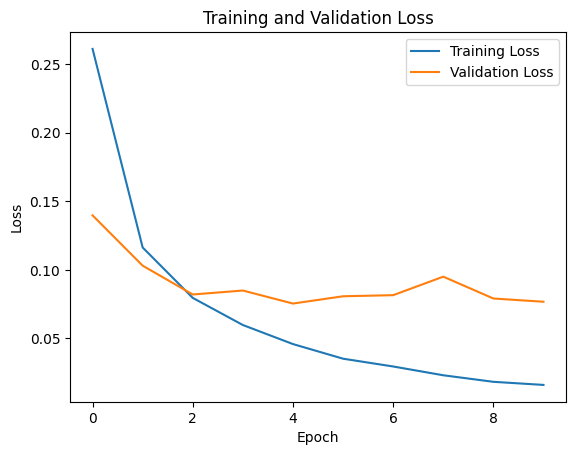

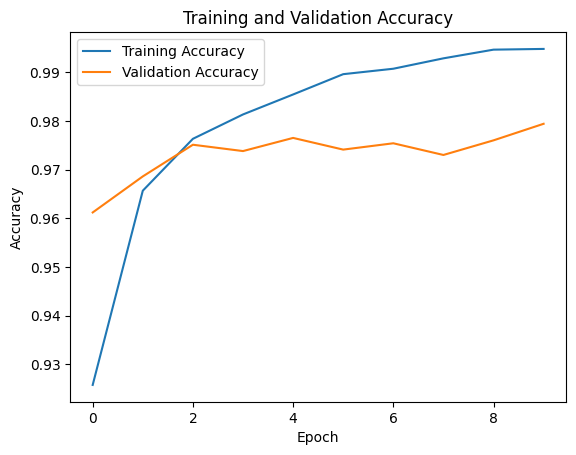

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# convert the model 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# convert to a c header file 
!apt-get update && apt-get -qq install xxd
!xxd -i model.tflite > model.h

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,323 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [969 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-backpo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
